In [1]:
import sys
import numpy as np
model_dir = 'code/'                        
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import warnings

warnings.filterwarnings("ignore")
np.seterr(divide='ignore', invalid='ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from model import model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from libscores import get_metric

In [3]:
from data_io import read_as_df
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data_manager import DataManager
data_dir = '../malaria_input_data'              # Change this to the directory where you put the input data
data_name = 'malaria'
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame


D = DataManager(data_name, data_dir, replace_missing=True)

Reading ../malaria_input_data/malaria_train from AutoML format
Number of examples = 16534
Number of features = 19
         Class
0   uninfected
1  parasitized
Number of classes = 2
Info file found : C:\Users\USER\Documents\dernierMiniPro\MOSQUITO\malaria_input_data\malaria_public.info


In [4]:
from model import model

In [5]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

In [6]:
M = model()

In [7]:
warnings.filterwarnings("ignore")
np.seterr(divide='ignore', invalid='ignore')

metric_name, scoring_function = get_metric()
scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))

In [8]:
scores.mean()

0.9555130026231369

Recherche du meilleur hyperparametre :

In [9]:
from visualization import f_test_estimator

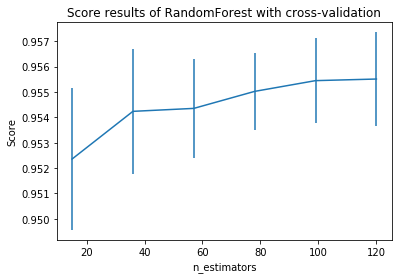

In [10]:
f_test_estimator(X_train, Y_train)

on voit qu'il faut au moins 100 arbres !